# import

In [8]:
from airbnb_mysql import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connexion to database

In [9]:
port_name = '3306'
user_name = 'root'
user_password = 'root'
host_name = 'localhost'
db = 'airbnb'

connection = create_db_connection(user=user_name, password=user_name, host=host_name, db_name=db, port=port_name)

query = """
        SELECT * FROM apartment;
"""

col_name = ["id", "neighbour", "lat", "long", "r_type", "price", "nbr_rev", "rev_per_month"]
data = db_to_df(connection, query, col_name)

MySQL Database connection successful


# Preprocessing

In [11]:
df = data.drop(["id","nbr_rev","rev_per_month"],axis = 1)

In [ ]:
def r_type

In [ ]:
def encoding

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set,test_set = train_test_split(df,test_size=0.3,random_state=0)

                lat          long         price
count  65858.000000  65858.000000  65858.000000
mean      48.864204      2.345344    114.382581
std        0.018322      0.033285    220.227932
min       48.812850      2.227330      8.000000
25%       48.850910      2.324330     60.000000
50%       48.865490      2.348250     80.000000
75%       48.879070      2.370578    120.000000
max       48.904150      2.473790  11600.000000
neighbour----------------------------------------- ['EntrepÃ´t' 'Observatoire' 'Temple' 'HÃ´tel-de-Ville' 'OpÃ©ra' 'Louvre'
 'Popincourt' 'Buttes-Montmartre' 'Ãx89lysÃ©e' 'PanthÃ©on' 'Gobelins'
 'Luxembourg' 'Buttes-Chaumont' 'Palais-Bourbon' 'Reuilly' 'Bourse'
 'MÃ©nilmontant' 'Vaugirard' 'Batignolles-Monceau' 'Passy']
r_type-------------------------------------------- ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
                 neighbour       lat     long           r_type  price  nbh  \
0                EntrepÃ´t  48.86993  2.36251  Entire h

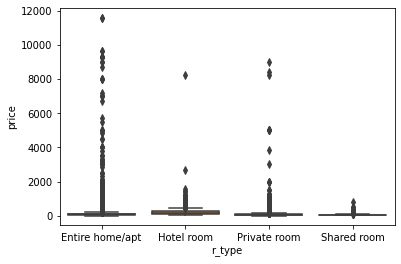

In [4]:
new_df = df.drop(['id', 'nbr_rev', 'rev_per_month'], axis=1)
new_df = new_df[df != 0].dropna()
#new_df = new_df[df['price'] < 500].dropna()
print(new_df.describe())

for col in new_df.select_dtypes('object'):
    print(f'{col:-<50} {new_df[col].unique()}')

#neighbour
encoder = LabelEncoder()
neigh = encoder.fit_transform(new_df["neighbour"])
new_df['nbh'] = neigh

#room
room_encoder = LabelEncoder()
room = room_encoder.fit_transform(new_df["r_type"])
new_df["room"] = room

new_df.sort_values('room', axis=0, inplace=True)
new_df = new_df.reset_index(drop=True)

print(new_df)
print(new_df['r_type'].value_counts())

grouped_df = new_df.groupby(['r_type'])
print(grouped_df['price'].mean())

print(new_df['neighbour'].value_counts())

grouped_df = new_df.groupby(['neighbour'])
print(grouped_df['price'].mean())

sns.boxplot(x='r_type',y='price',data=new_df)
plt.show()